In [1]:
#!pip install yfinance
#!pip install yahoofinancials

import pandas as pd
import yfinance as yf


cardano = yf.download('ADA-USD',
                      start='2019-01-01',
                      end='2024-12-29',
                      progress=False,
)
cardano.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD,ADA-USD
Date,,,,,,
2019-01-01,0.042547,0.042547,0.042547,0.040308,0.040984,14962902
2019-01-02,0.045258,0.045258,0.045563,0.041982,0.042568,24151526
2019-01-03,0.042682,0.042682,0.045259,0.042535,0.045106,21126963
2019-01-04,0.043812,0.043812,0.044092,0.042477,0.042629,16024029
2019-01-05,0.044701,0.044701,0.045570,0.043350,0.043659,25100965


In [2]:
#Close price data
closing_price = cardano[['Close']]

In [3]:
closing_price['Close']

Ticker,ADA-USD
Date,
2019-01-01,0.042547
2019-01-02,0.045258
2019-01-03,0.042682
2019-01-04,0.043812
2019-01-05,0.044701
...,...
2024-12-24,0.936460
2024-12-25,0.916859
2024-12-26,0.859785


In [4]:
import matplotlib.pyplot as plt

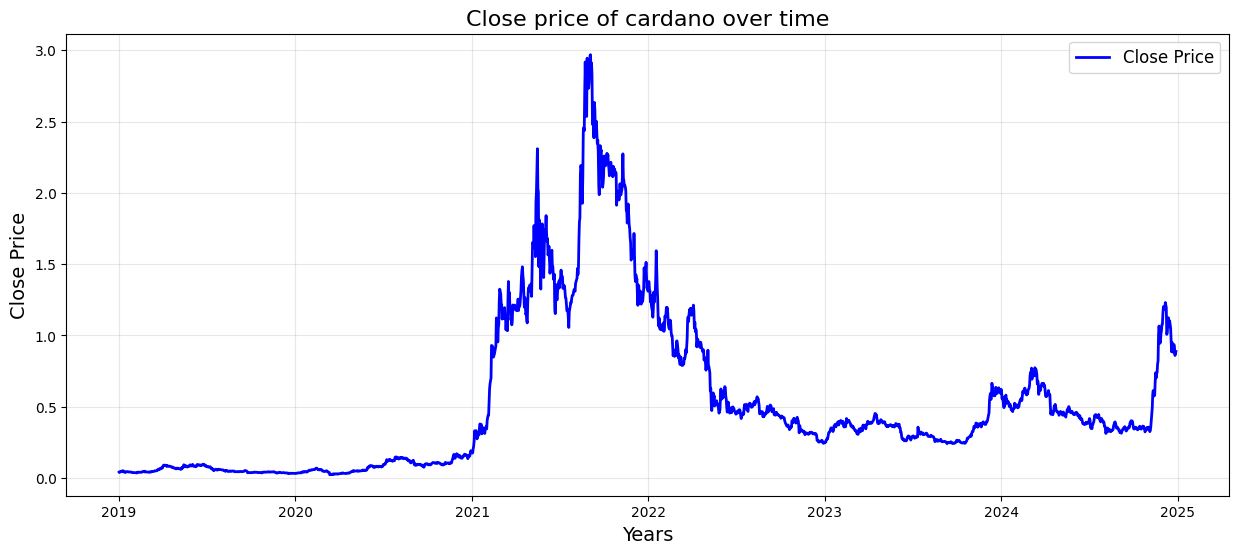

In [5]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of cardano over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [6]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [7]:
df1 = pd.DataFrame(temp_data)

In [8]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [9]:
for i in range(2019, 2025):
    print(i, list(cardano.index.year).count(i))

2019 365
2020 366
2021 365
2022 365
2023 365
2024 363


In [10]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-10-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-10-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


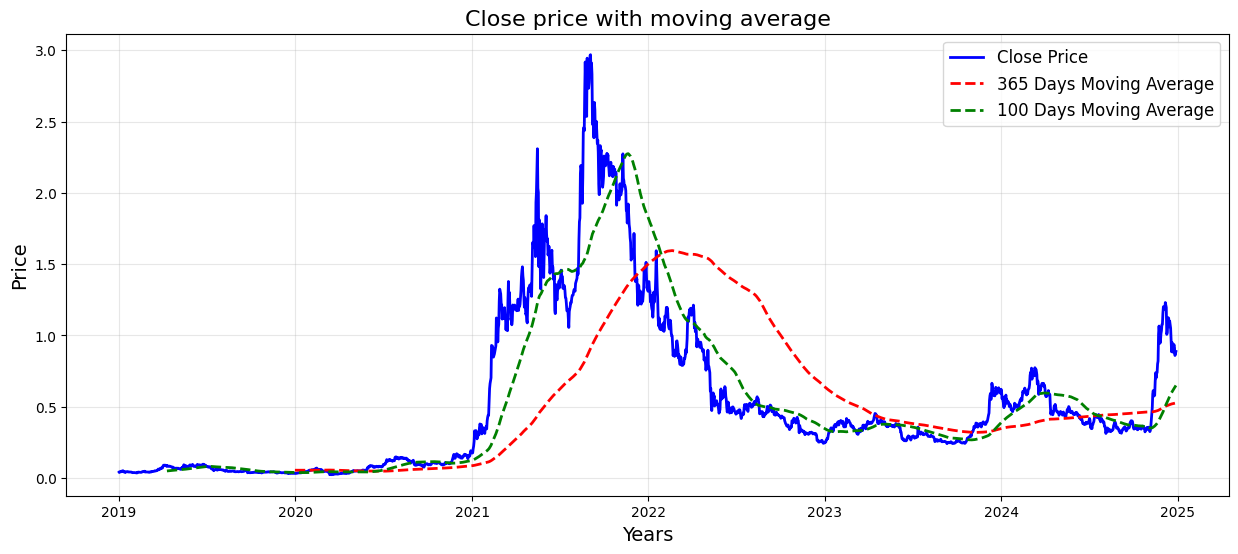

In [11]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
scaled_data = closing_price['Close'].dropna().values.reshape(-1, 1)

In [13]:
len(scaled_data)

2189

In [14]:
import numpy as np

In [15]:
# Prepare data
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
x_data = x_data.reshape(2089, 100)
y_data = np.array(y_data)

In [16]:
x_data.shape

(2089, 100)

In [17]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [18]:
x_train.shape

(1880, 100)

In [19]:
x_train[0]

array([0.042547, 0.045258, 0.042682, 0.043812, 0.044701, 0.049261,
       0.047996, 0.048525, 0.052169, 0.044529, 0.044147, 0.043704,
       0.040241, 0.044059, 0.04281 , 0.044777, 0.045318, 0.044316,
       0.04575 , 0.043477, 0.042937, 0.043578, 0.0429  , 0.043027,
       0.042691, 0.042649, 0.041168, 0.038772, 0.038251, 0.039656,
       0.038374, 0.038678, 0.039317, 0.038029, 0.037857, 0.037896,
       0.036663, 0.036396, 0.040751, 0.041058, 0.04283 , 0.041733,
       0.041751, 0.041118, 0.04054 , 0.0406  , 0.041026, 0.041452,
       0.045605, 0.046158, 0.047551, 0.044969, 0.046163, 0.048593,
       0.042456, 0.044043, 0.043304, 0.04327 , 0.043123, 0.043279,
       0.042838, 0.042312, 0.040602, 0.043212, 0.042843, 0.042944,
       0.042664, 0.046728, 0.045698, 0.047633, 0.047397, 0.04659 ,
       0.048055, 0.050077, 0.051621, 0.050207, 0.050452, 0.052594,
       0.053891, 0.0529  , 0.058062, 0.063781, 0.061704, 0.059025,
       0.06237 , 0.067595, 0.065828, 0.071289, 0.071739, 0.069

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [22]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R^2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Linear Regression - MSE: 0.0009749204743162684, R^2: 0.9858515958575912
Random Forest - MSE: 0.0010397570619438531, R^2: 0.9849106634747595
Gradient Boosting - MSE: 0.0011246195068613097, R^2: 0.9836791084927523


In [23]:
predictions = models['Linear Regression'].predict(x_test)

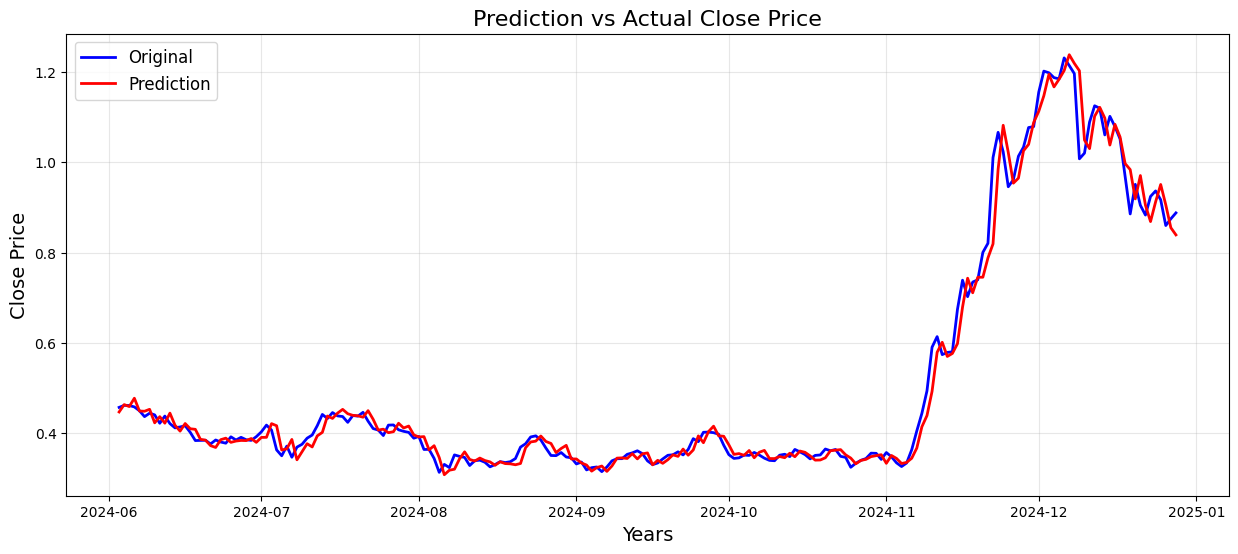

In [24]:
plotting_data = pd.DataFrame(
    {
        'Original': y_test.flatten(),
        'Prediction': predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [25]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1)
future_predictions=[]
for _ in range(10):
    next_days = models['Linear Regression'].predict(last_100)
    future_predictions.append(next_days)
    last_100 = np.append(last_100[:, 1:], next_days.reshape(1, 1), axis = 1)

In [26]:
future_predictions

[array([[0.86000639]]),
 array([[0.8385994]]),
 array([[0.83530038]]),
 array([[0.86288974]]),
 array([[0.86820131]]),
 array([[0.87260415]]),
 array([[0.87954167]]),
 array([[0.87665497]]),
 array([[0.87469603]]),
 array([[0.86292839]])]

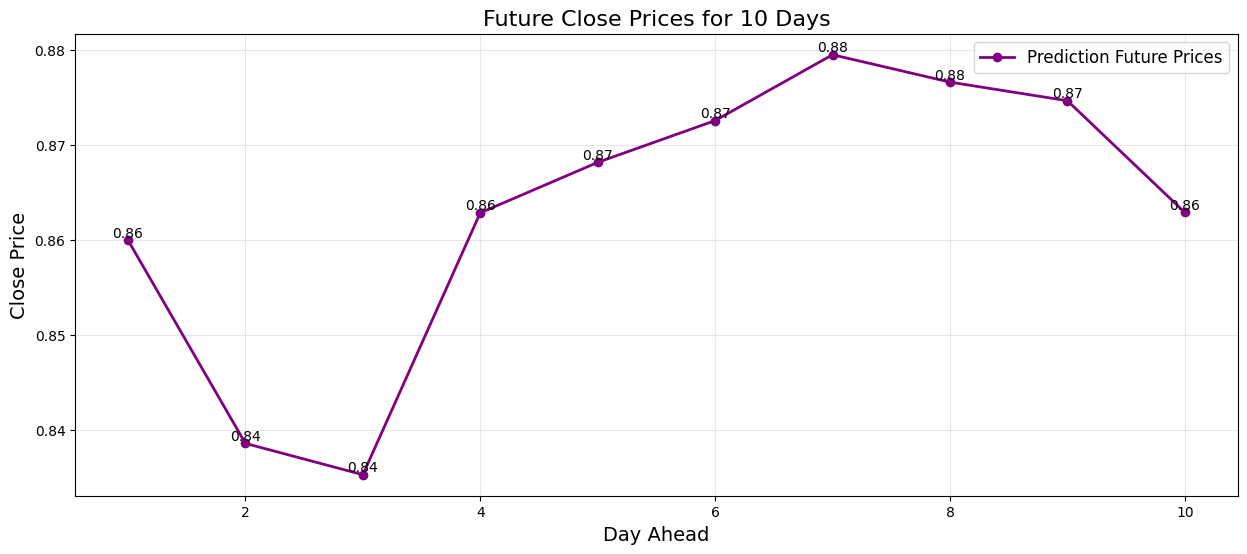

In [27]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [28]:
import joblib

# Save the model and scaler
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')

['linear_regression_model.pkl']

In [29]:
from google.colab import files

# Download the saved files
files.download('linear_regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Save last_100 to a .npy file
np.save('last_100.npy', last_100)

# Download the saved file
files.download('last_100.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>